In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/sac_find_best.csv')
df.drop('name', axis=1, inplace=True)

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,pin,size,threads,runtime,runtimesd,energy,energysd,MFLOP/J,GFLOP/s
0,True,500,1,0.154459,0.000138,2.386770,0.025006,104.639316,1.616932
1,True,500,2,0.162390,0.001210,2.591327,0.020763,96.379191,1.537964
2,True,500,3,0.104432,0.001706,2.011228,0.032286,124.177865,2.391509
3,True,500,4,0.078202,0.001963,1.584825,0.039805,157.588397,3.193634
4,True,500,5,0.061694,0.001883,1.444364,0.052283,172.913500,4.048180
...,...,...,...,...,...,...,...,...,...
347,False,1500,12,3.211053,0.070060,104.350030,1.753908,64.664572,2.101414
348,False,1500,13,2.933528,0.024743,105.212640,0.986433,64.134404,2.300217
349,False,1500,14,2.743748,0.051418,99.632416,1.403257,67.726452,2.459318
350,False,1500,15,2.641714,0.038911,104.064280,1.072491,64.842134,2.554308


In [5]:
df_grouped = df.groupby(['size', 'pin'])

/tmp/ipykernel_206748/2341850275.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


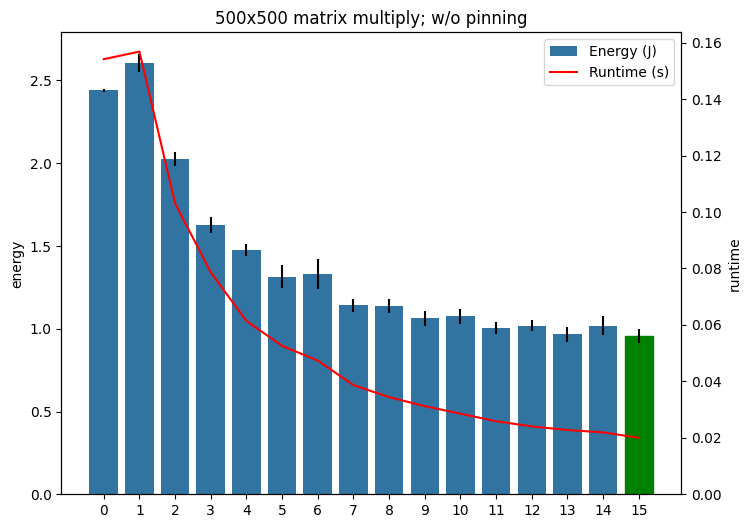

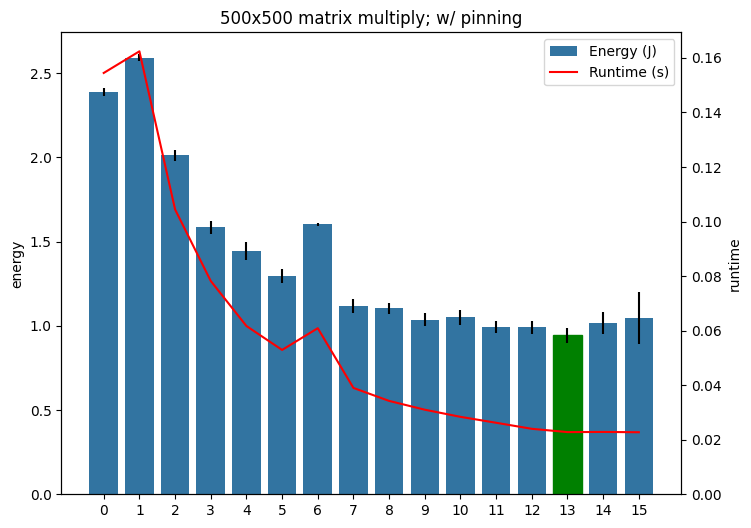

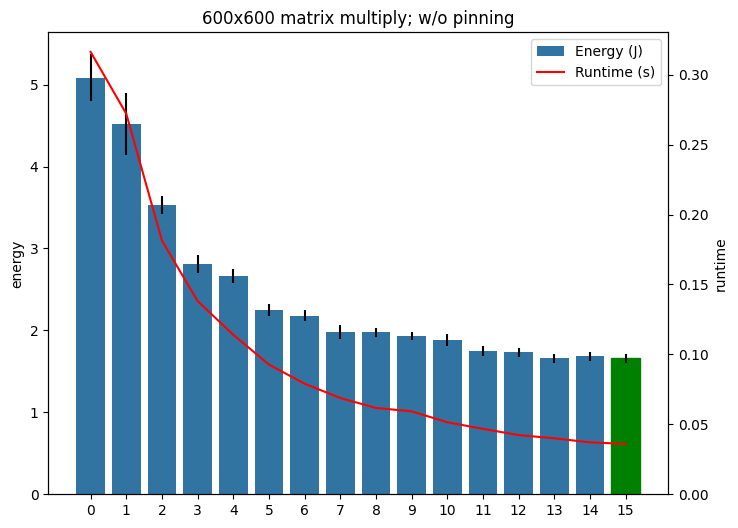

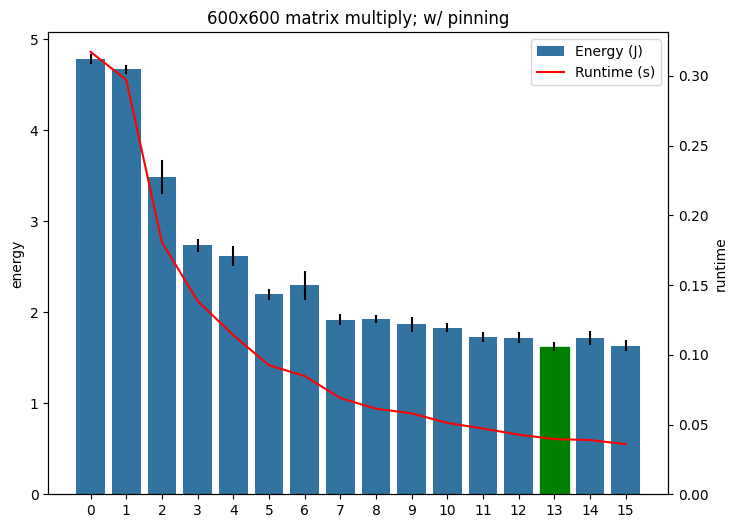

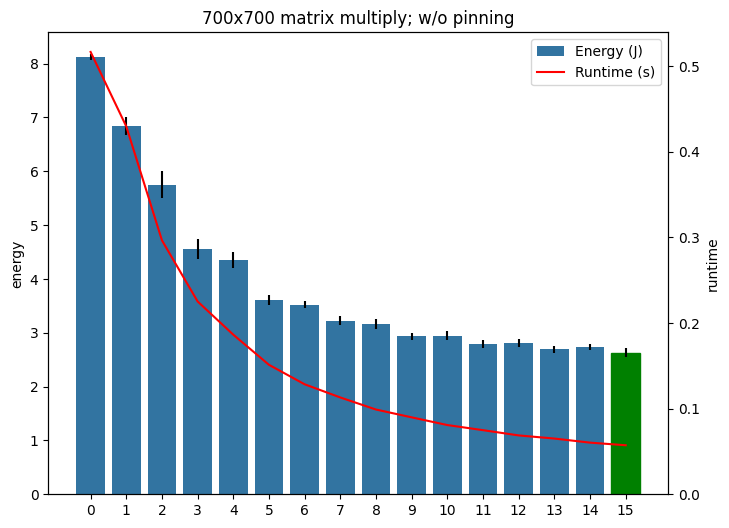

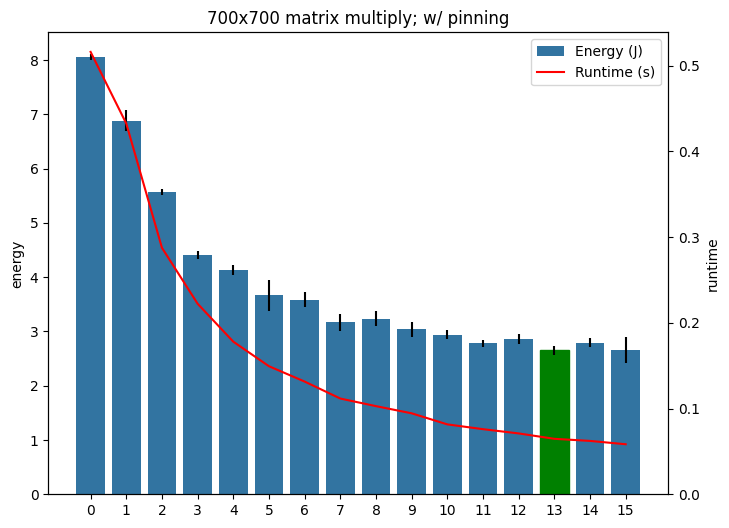

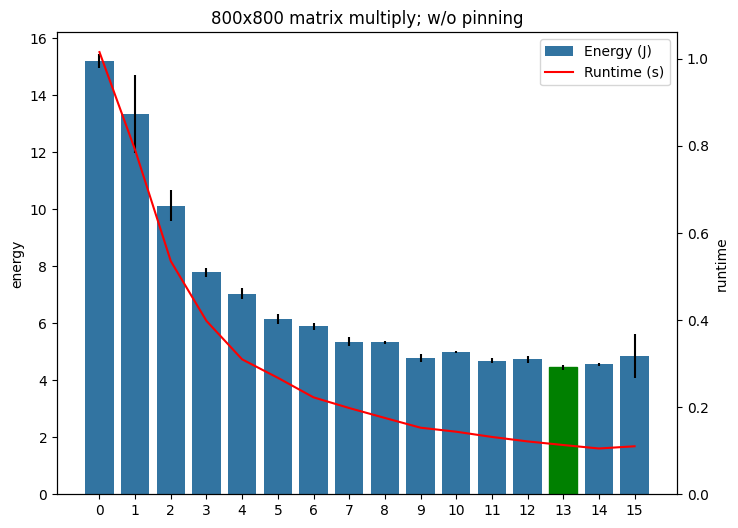

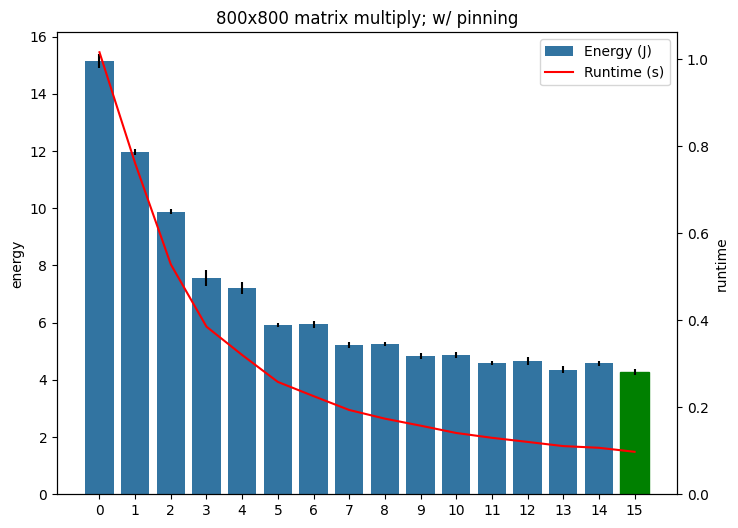

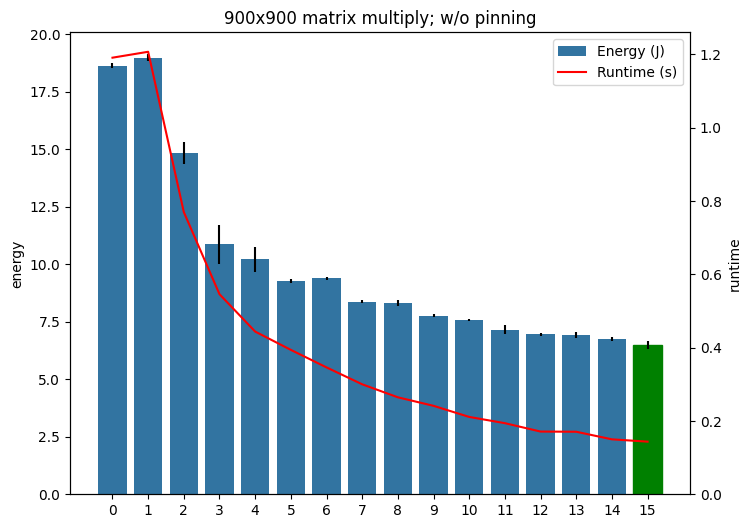

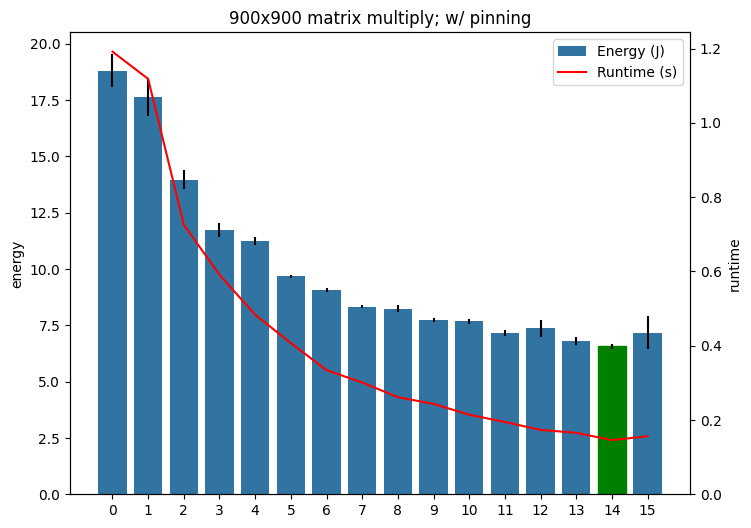

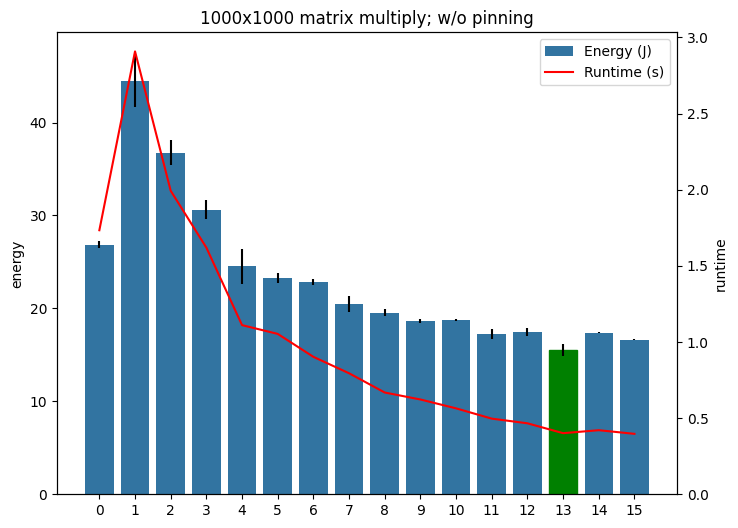

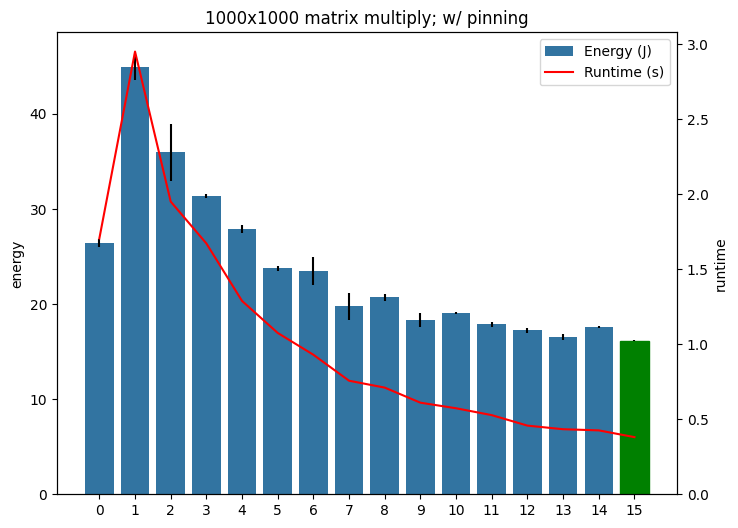

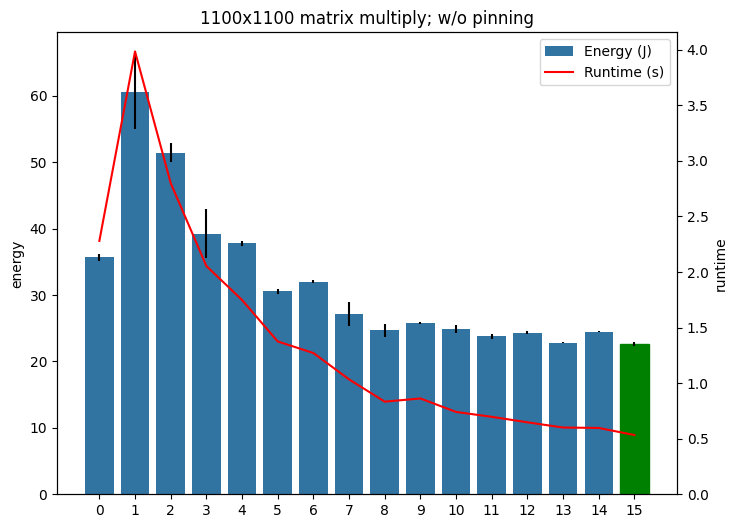

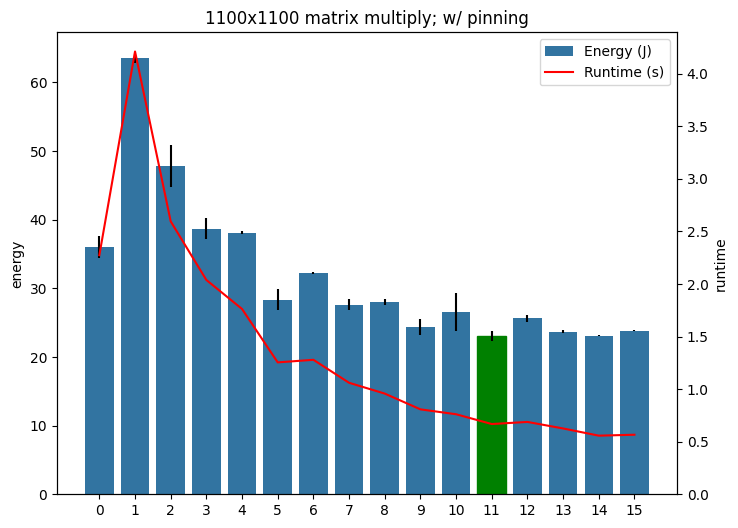

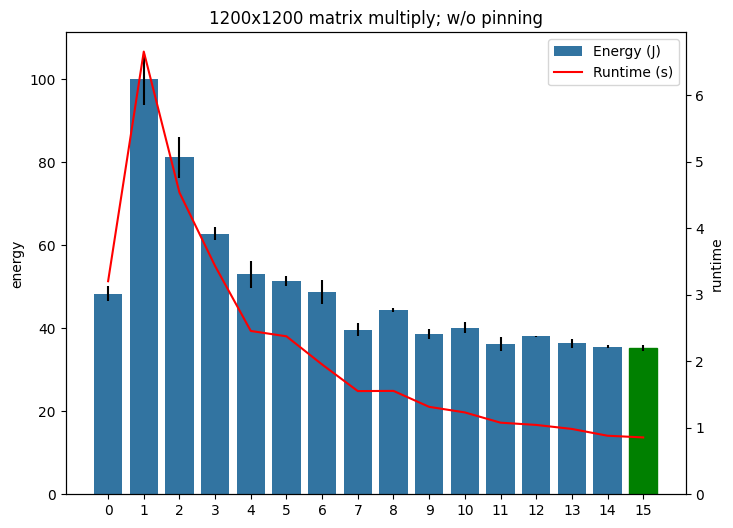

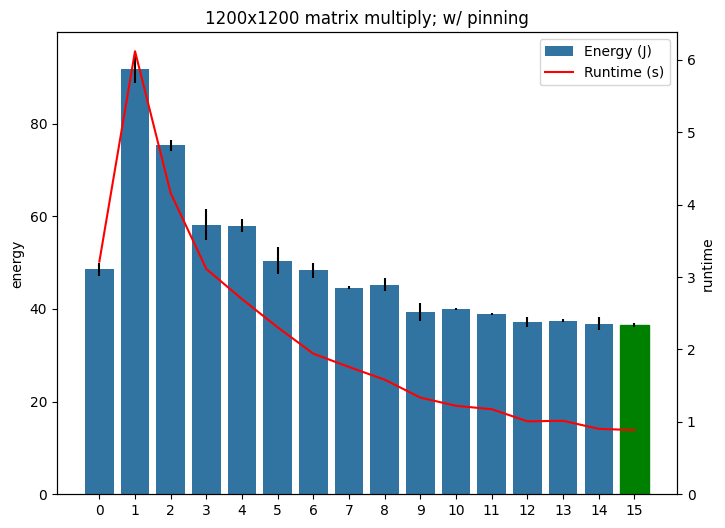

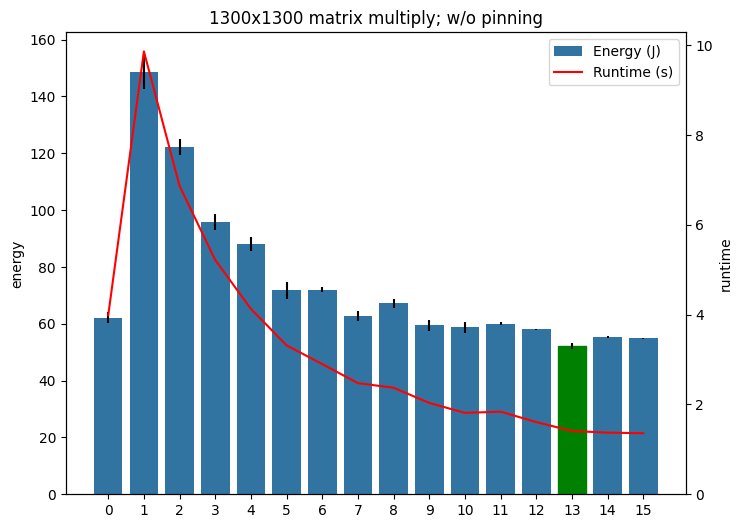

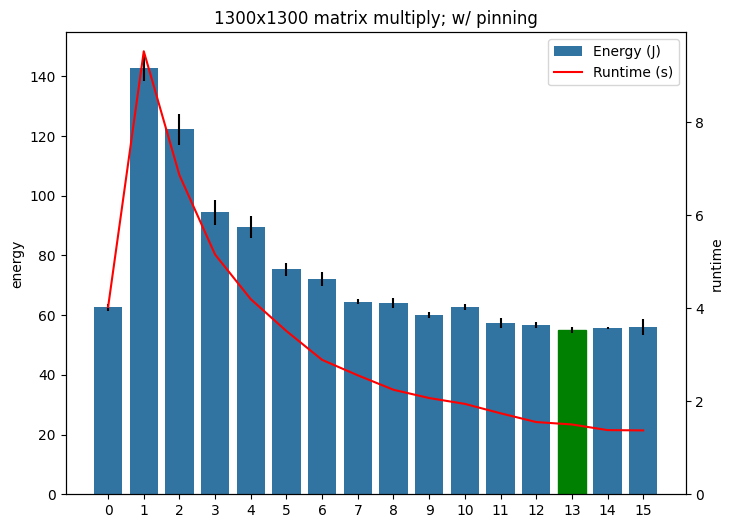

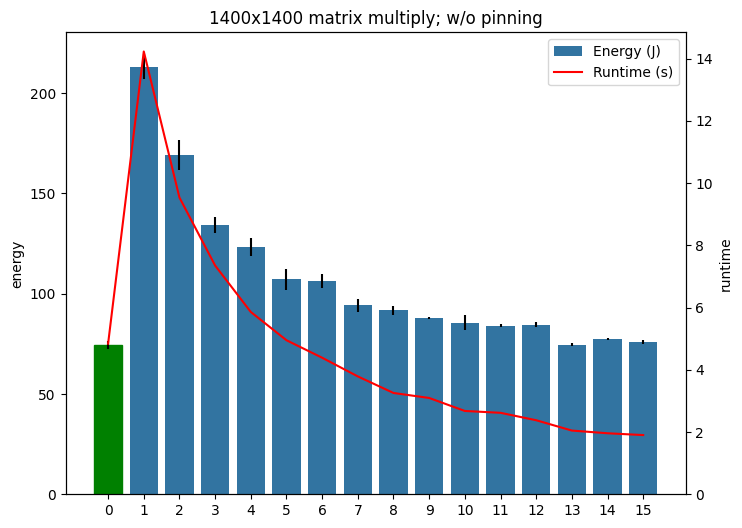

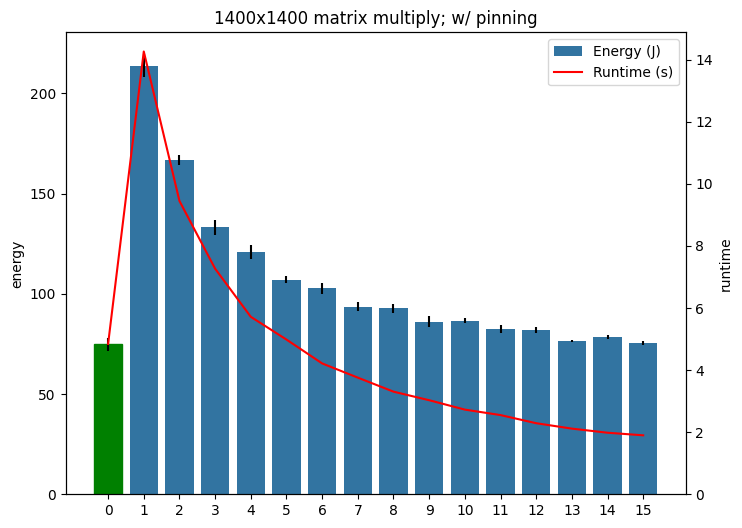

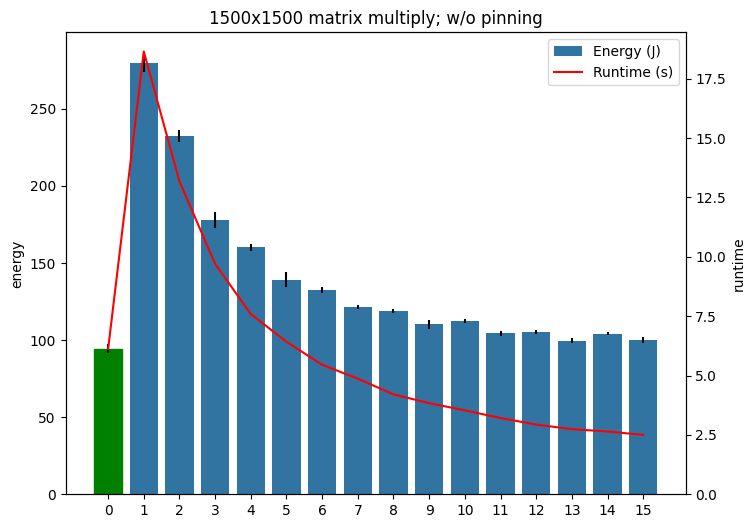

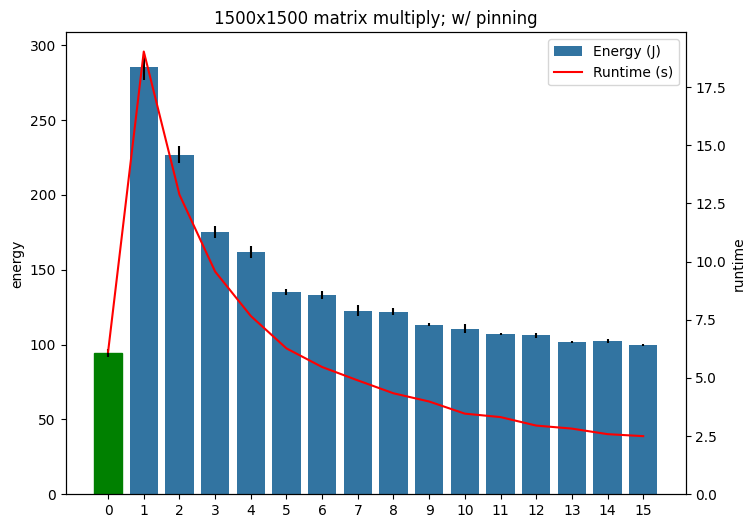

In [6]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energysd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

/tmp/ipykernel_206748/1063131660.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


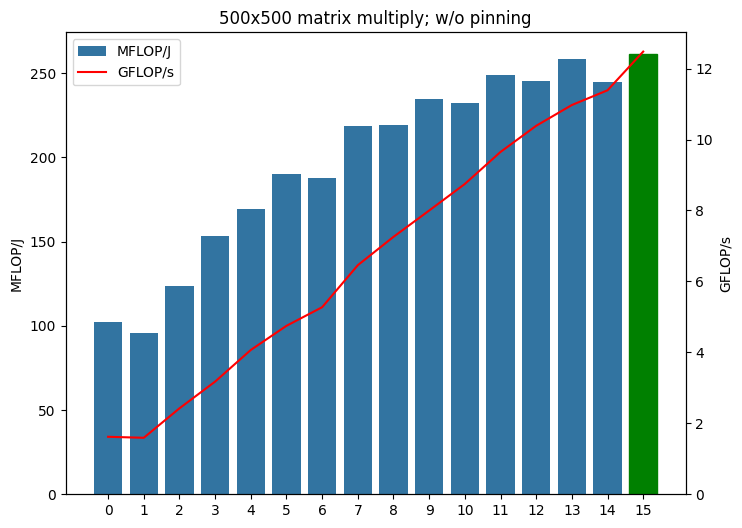

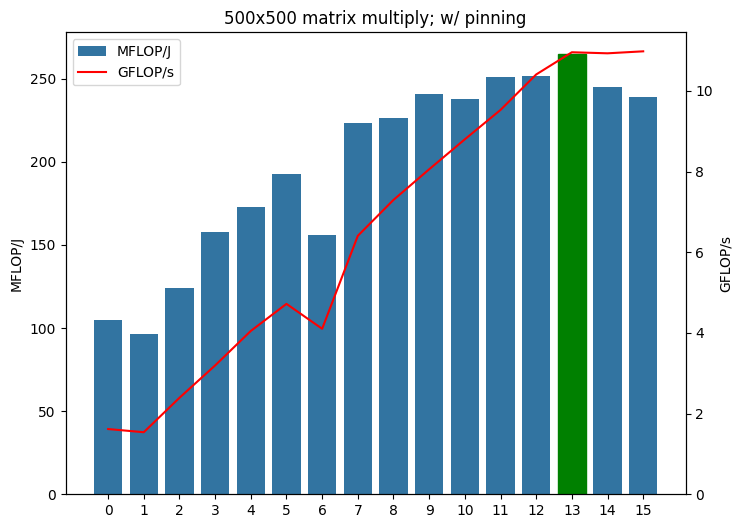

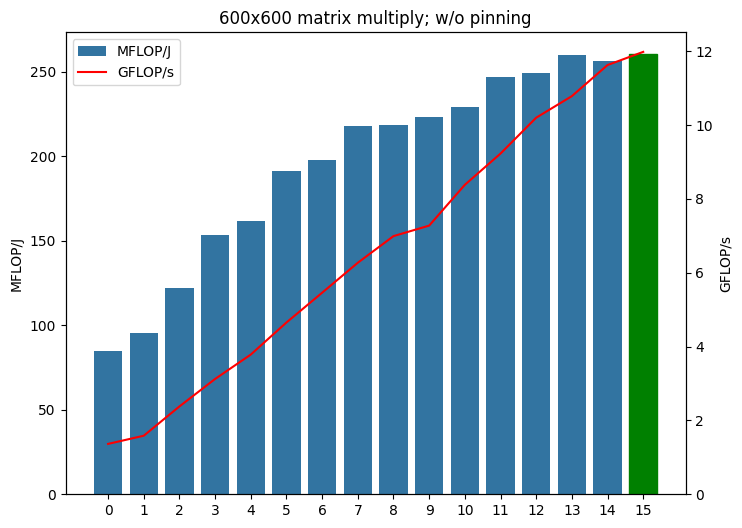

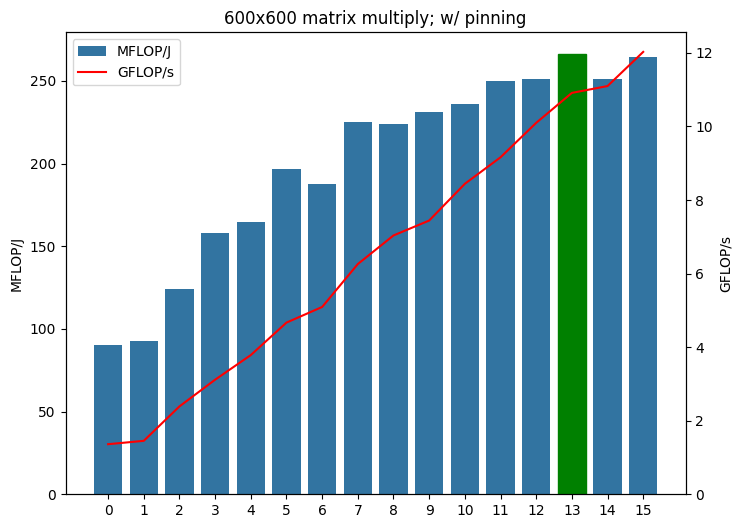

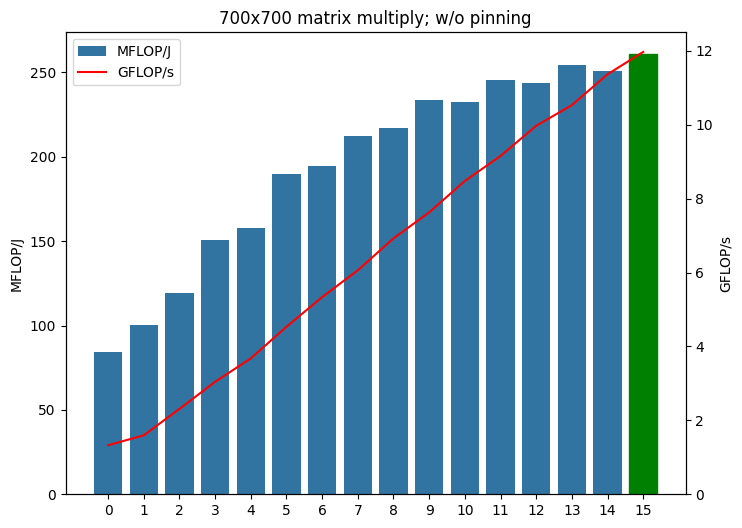

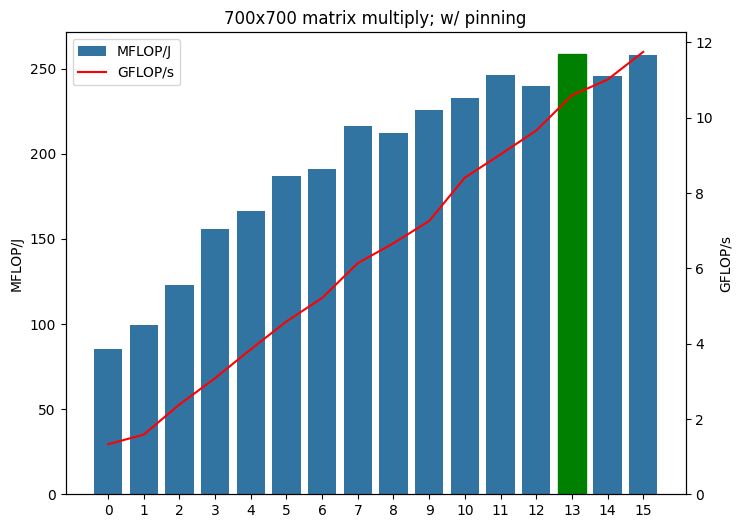

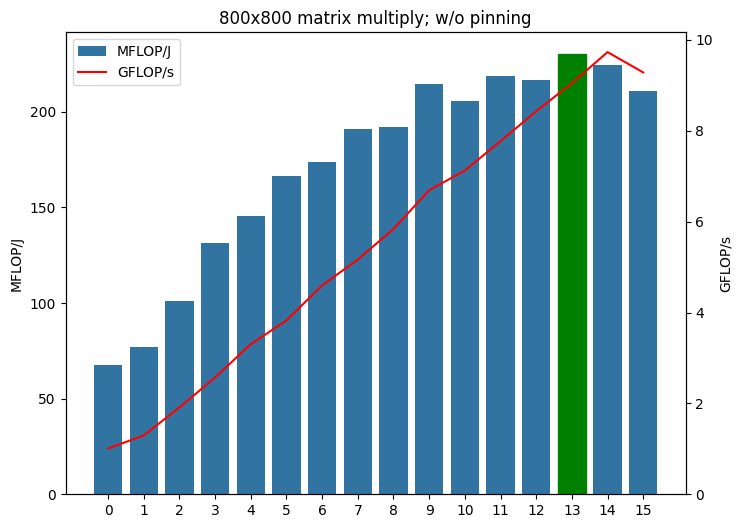

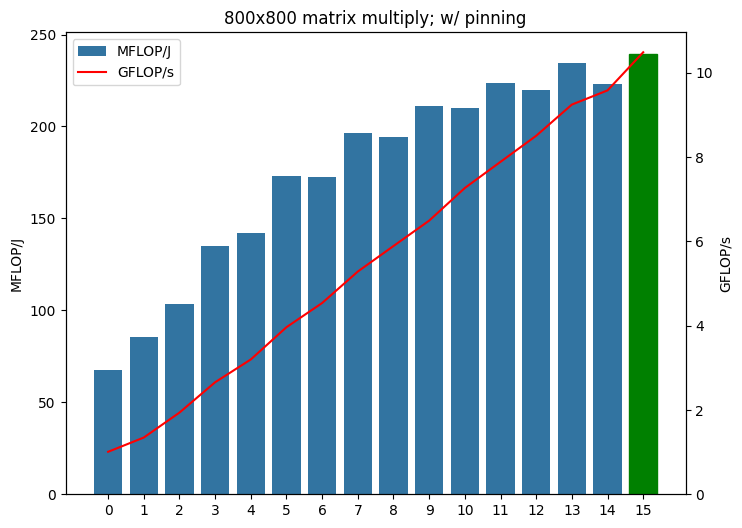

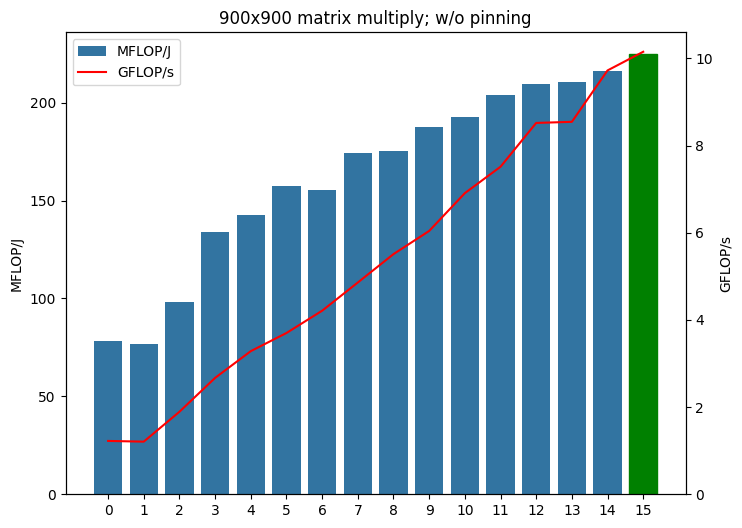

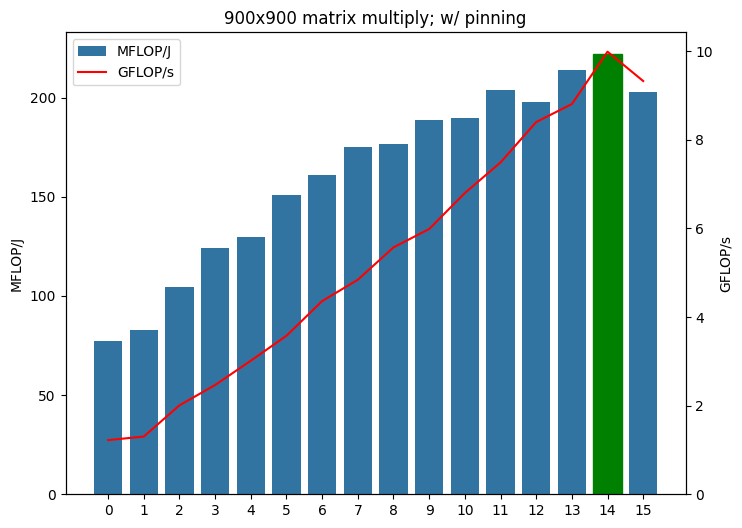

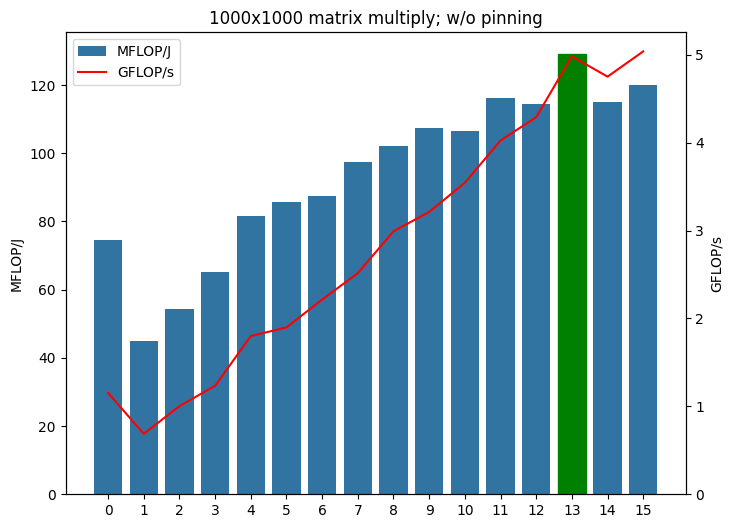

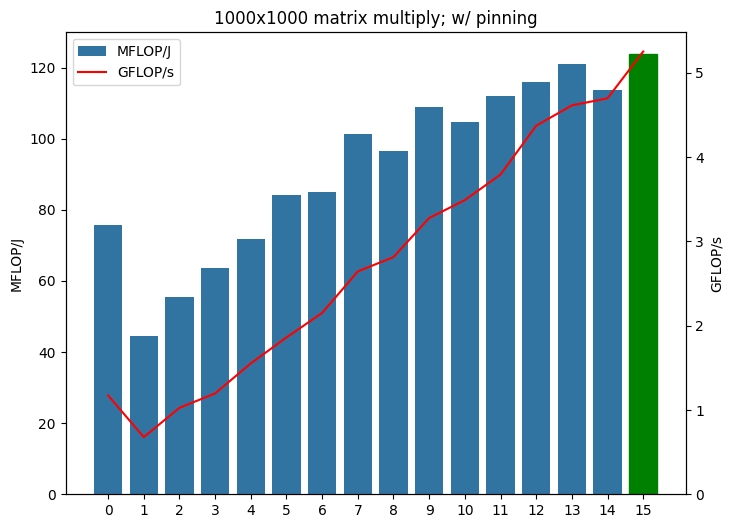

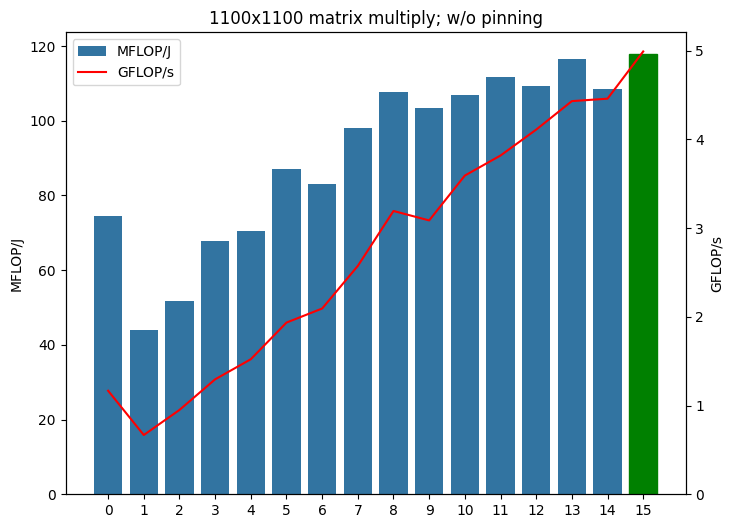

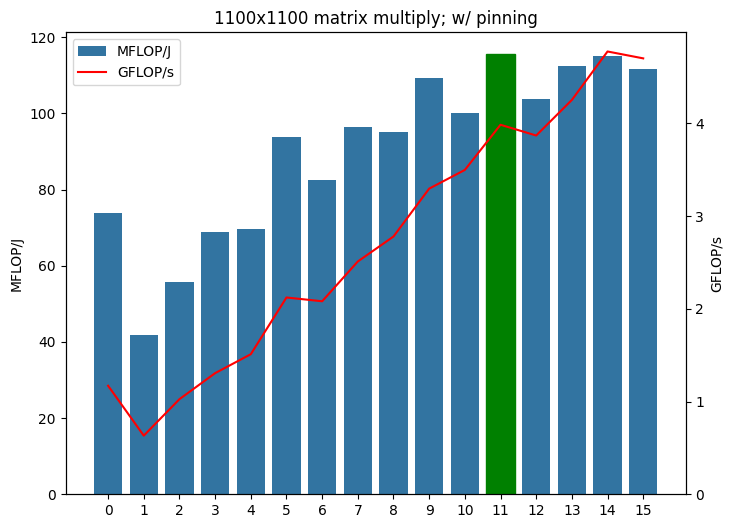

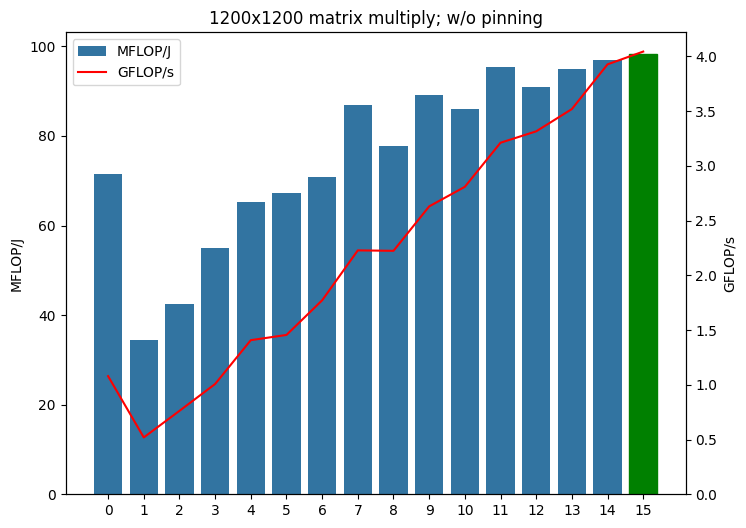

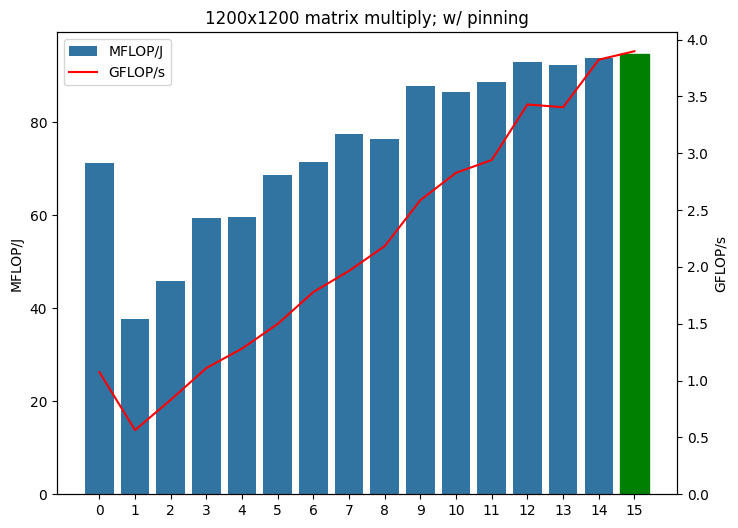

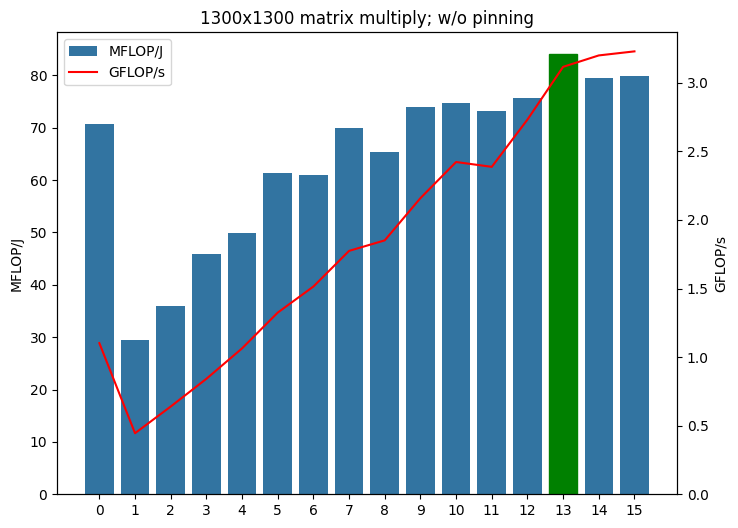

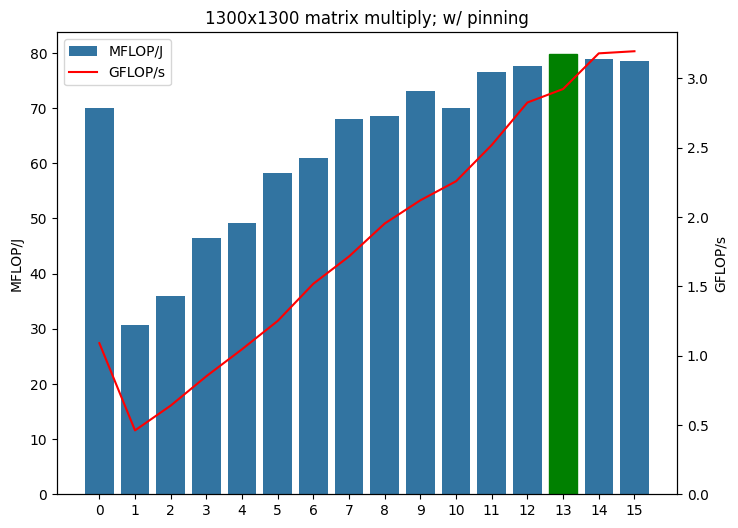

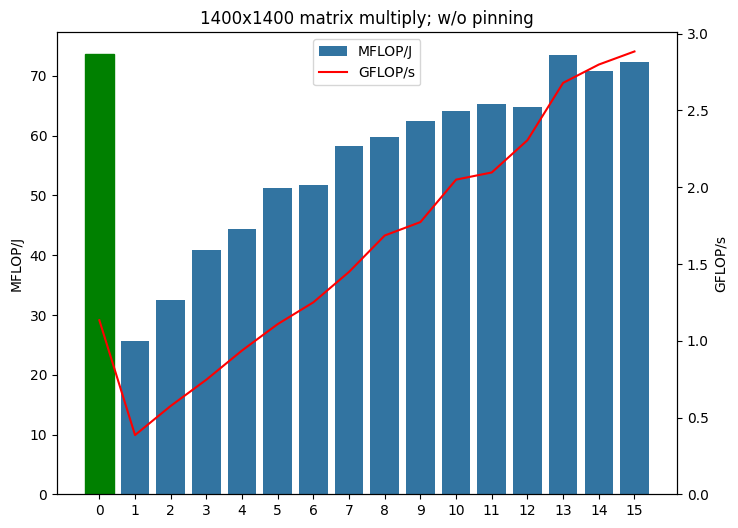

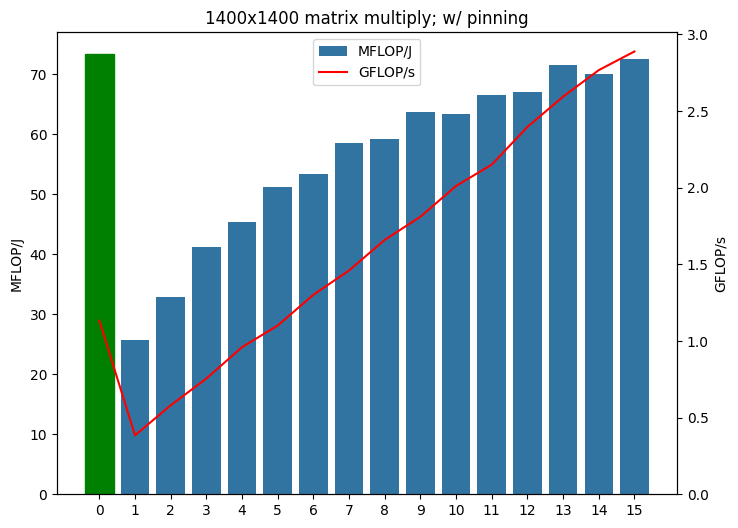

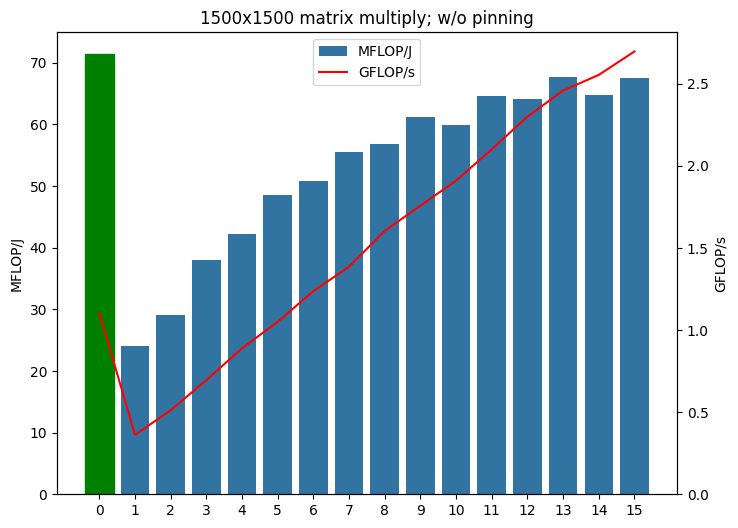

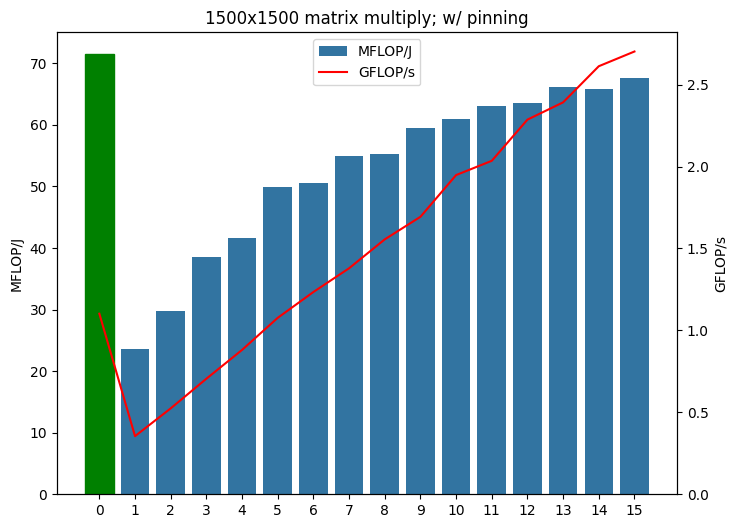

In [7]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()